In [1]:
import numpy as np
import nilearn.plotting as nplt
import nibabel as nib
import matplotlib.pyplot as plt
import os.path as op
from  nilearn.datasets import fetch_surf_fsaverage
from os import listdir

bids_folder = '/Volumes/mrenkeED/data/ds-dnumrisk'
grad_folder = 'derivatives/gradients'

subList = [f[4:6] for f in listdir(op.join(bids_folder, grad_folder)) if f[0:4] == 'sub-' and len(f)==6]
#subList_npFiles = [f for f in listdir(op.join(bids_folder, grad_folder)) if f[0:4] == 'sub-'] #  and len(f)==45


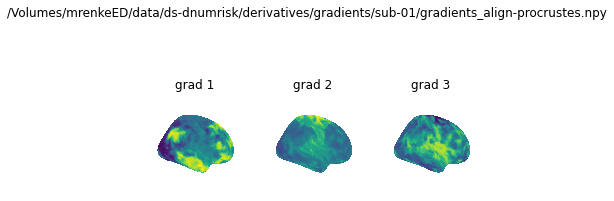

In [4]:
from utils import plot_GM12_from_sum_npfile

#fn = subList_npFiles[1]
#fn = '/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/gradients/sub-01/sub-01_gradients_removed-taskeffect_align-procrustes.npy'
fn = '/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/gradients/sub-01/gradients_align-procrustes.npy'
plot_GM12_from_sum_npfile(file=fn)

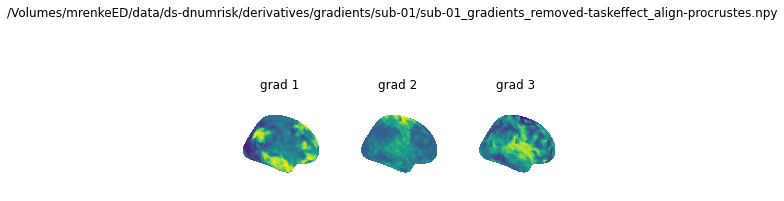

In [5]:
fn = '/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/gradients/sub-01/sub-01_gradients_removed-taskeffect_align-procrustes.npy'
plot_GM12_from_sum_npfile(file=fn)

In [4]:
# grad 3 in .gii format missing, so we need to convert it from .npy
specification = '_reordMaskFlip'

for sub in subList:
    ses=1
    target_dir = op.join(bids_folder, 'derivatives', 'gradients', f'sub-{sub}', f'ses-{ses}')

    for n_grad in [3]:
        grad = np.load(op.join(target_dir, f'grad{n_grad}{specification}.npy'))
        grad = np.split(grad,2) # for i, hemi in enumerate(['L', 'R']): --> left first

        for h, hemi in enumerate(['L', 'R']):    

            gii_im_datar = nib.gifti.gifti.GiftiDataArray(data=grad[h])
            gii_im = nib.gifti.gifti.GiftiImage(darrays= [gii_im_datar])

            out_file = op.join(target_dir, f'sub-{sub}_ses-{ses}_task-risk_space-fsaverage5_hemi-{hemi}_grad{n_grad}{specification}.surf.gii')
            gii_im.to_filename(out_file) # https://nipy.org/nibabel/reference/nibabel.spatialimages.html



In [5]:
# plot all 3 gradiets for all subjects
from utils_02 import get_GMmargulies_cmap

plot_folder_name = '/Users/mrenke/data/ds-dnumrisk/plots_and_ims' #op.join(bids_folder, 'derivatives', 'gradients', 'plots')
fsaverage = fetch_surf_fsaverage() # default is fsav5
cmap = get_GMmargulies_cmap()

hemi = 'R'

side_view = 'medial' if hemi == 'R' else 'lateral'


for sub in subList:
    figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5),subplot_kw=dict(projection='3d'))
    grad_n = 1
    gm = nib.load(op.join(bids_folder,grad_folder,f'sub-{sub}','ses-1',f'sub-{sub}_ses-1_task-risk_space-fsaverage5_hemi-{hemi}_grad{grad_n}{specification}.surf.gii')).agg_data()

    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False, title=f'sub-{sub},{specification}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.5,axes=axes[0])
    grad_n = 2
    gm = nib.load(op.join(bids_folder,grad_folder,f'sub-{sub}','ses-1',f'sub-{sub}_ses-1_task-risk_space-fsaverage5_hemi-{hemi}_grad{grad_n}{specification}.surf.gii')).agg_data()
    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False, title=f'sub-{sub}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.5,axes=axes[1])
    grad_n = 3
    gm = nib.load(op.join(bids_folder,grad_folder,f'sub-{sub}','ses-1',f'sub-{sub}_ses-1_task-risk_space-fsaverage5_hemi-{hemi}_grad{grad_n}{specification}.surf.gii')).agg_data()
    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False, title=f'sub-{sub}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.5,axes=axes[2])

    plt.savefig(op.join(plot_folder_name, f'sub-{sub}_grad123{specification}.png'),dpi=300)
    plt.close()